In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load dataset
df = pd.read_csv(r'C:\Users\Ayesha\Desktop\ML_tasks\task5\train.csv')

# Display first few rows of the dataset
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Explore dataset statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [24]:
# Extract columns with null values
columns_with_null = df.columns[df.isnull().any()]
# Display columns with null values
print("Columns with null values:")
for col in columns_with_null:
    print(col)

Columns with null values:
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [25]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values and their corresponding counts
columns_with_missing_values = missing_values[missing_values > 0]
print("\nColumns with Missing Values:")
print(columns_with_missing_values)


Columns with Missing Values:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [27]:
# Check for duplicate rows
duplicates_before = df.duplicated().sum()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check for duplicate rows after removal
duplicates_after = df.duplicated().sum()

# Print the results
if duplicates_before > 0:
    print(f"Handling Duplicates\n{duplicates_before} duplicate row(s) were found and removed.")
else:
    print("Handling Duplicates\nNo duplicate rows found in the dataset.")


Handling Duplicates
No duplicate rows found in the dataset.


In [35]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Get the column names and data types
column_info = df.dtypes

# Convert the Series to a DataFrame for better display
column_info_df = pd.DataFrame({'Column': column_info.index, 'Data Type': column_info.values})

# Display the DataFrame
print(column_info_df)

           Column Data Type
0              Id     int64
1      MSSubClass     int64
2        MSZoning    object
3     LotFrontage   float64
4         LotArea     int64
5          Street    object
6           Alley    object
7        LotShape    object
8     LandContour    object
9       Utilities    object
10      LotConfig    object
11      LandSlope    object
12   Neighborhood    object
13     Condition1    object
14     Condition2    object
15       BldgType    object
16     HouseStyle    object
17    OverallQual     int64
18    OverallCond     int64
19      YearBuilt     int64
20   YearRemodAdd     int64
21      RoofStyle    object
22       RoofMatl    object
23    Exterior1st    object
24    Exterior2nd    object
25     MasVnrType    object
26     MasVnrArea   float64
27      ExterQual    object
28      ExterCond    object
29     Foundation    object
30       BsmtQual    object
31       BsmtCond    object
32   BsmtExposure    object
33   BsmtFinType1    object
34     BsmtFinSF1   

In [39]:
#  list of categorical columns to exclude
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

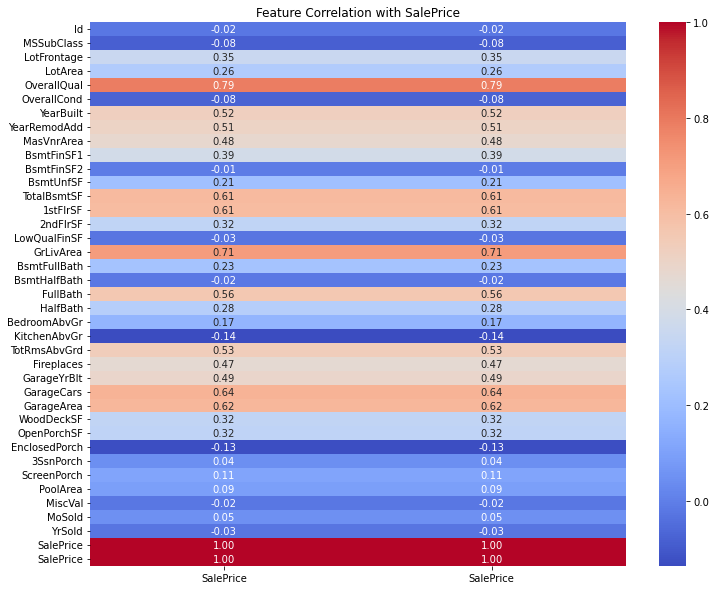

In [42]:
# Select numerical columns
numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Create a DataFrame with only numerical features and the target variable
numerical_data = df[numerical_columns + ['SalePrice']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 2: Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with SalePrice")
plt.show()

In [43]:
# Split the data into training and testing sets
X = df[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath',"FullBath", "HalfBath"]]
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

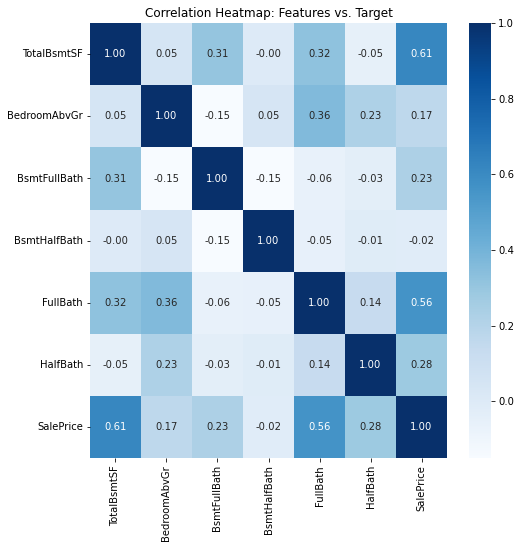

In [44]:
# Select the columns of interest (features and target)
features = df[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
target = df[['SalePrice']]

# Create a new DataFrame with only the selected columns
data_subset = pd.concat([features, target], axis=1)  # Use square brackets and specify axis=1

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap: Features vs. Target")
plt.show()

In [45]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2693215363.50
R-squared: 0.65


In [49]:
X.sample(10)

,TotalBsmtSF,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
601,780,3,0,0,1,1
383,784,2,0,0,1,0
1260,841,3,0,0,2,1
284,1575,2,1,0,2,0
991,916,4,0,0,1,1
166,1617,2,1,0,1,0
417,1370,4,1,0,2,1
680,923,2,0,0,2,0
322,1502,4,1,0,2,1
1007,546,3,0,0,1,1


In [50]:
# Predict the price of a new house
new_house = np.array([[2500, 3, 1,0,2,1]]) 
predicted_price = model.predict(new_house)
print(f"Predicted Price for the New House: ${predicted_price[0]:.2f}")

Predicted Price for the New House: $354103.01


C:\Users\Ayesha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



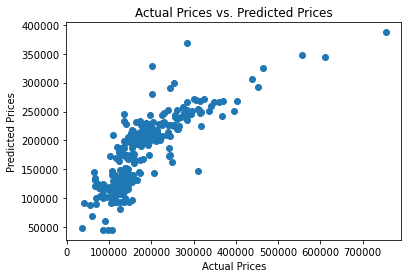

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()